In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

In [54]:
renewable_df = pd.read_csv("Resources/EP_renewable.csv")
renewable_df.head()

,series_id,country_code,country_name,year,value
0,EG.ELC.RNWX.ZS,USA,United States,2015,7.386955
1,EG.ELC.RNWX.ZS,USA,United States,2014,6.900029
2,EG.ELC.RNWX.ZS,USA,United States,2013,6.320009
3,EG.ELC.RNWX.ZS,USA,United States,2012,5.486241
4,EG.ELC.RNWX.ZS,USA,United States,2011,4.789611


In [55]:
gdp_df = pd.read_csv("Resources/cleaned_df.csv")
gdp_df.head()

,country_code,year,Current US Dollars
0,USA,2014,1.760000e+13
1,USA,2013,1.690000e+13
2,USA,2012,1.630000e+13
3,USA,2011,1.560000e+13
4,USA,2010,1.500000e+13


In [57]:
renewable_df=renewable_df.drop(columns=['series_id'])

In [58]:
renewable_df.head()


,country_code,country_name,year,value
0,USA,United States,2015,7.386955
1,USA,United States,2014,6.900029
2,USA,United States,2013,6.320009
3,USA,United States,2012,5.486241
4,USA,United States,2011,4.789611


In [59]:
merged_df = renewable_df.merge(gdp_df, on=['country_code', 'year'], how='inner')

In [60]:
merged_df.head()

,country_code,country_name,year,value,Current US Dollars
0,USA,United States,2014,6.900029,1.760000e+13
1,USA,United States,2013,6.320009,1.690000e+13
2,USA,United States,2012,5.486241,1.630000e+13
3,USA,United States,2011,4.789611,1.560000e+13
4,USA,United States,2010,4.097293,1.500000e+13


In [61]:
merged_df = merged_df.rename(columns={'value': '% renewable'})

In [62]:
merged_df.head()

,country_code,country_name,year,% renewable,Current US Dollars
0,USA,United States,2014,6.900029,1.760000e+13
1,USA,United States,2013,6.320009,1.690000e+13
2,USA,United States,2012,5.486241,1.630000e+13
3,USA,United States,2011,4.789611,1.560000e+13
4,USA,United States,2010,4.097293,1.500000e+13


In [63]:
merged_df

,country_code,country_name,year,% renewable,Current US Dollars
0,USA,United States,2014,6.900029,1.760000e+13
1,USA,United States,2013,6.320009,1.690000e+13
2,USA,United States,2012,5.486241,1.630000e+13
3,USA,United States,2011,4.789611,1.560000e+13
4,USA,United States,2010,4.097293,1.500000e+13
...,...,...,...,...,...
245,CAN,Canada,1994,1.042880,5.800000e+11
246,CAN,Canada,1993,0.916904,5.790000e+11
247,CAN,Canada,1992,0.869918,5.940000e+11
248,CAN,Canada,1991,0.783541,6.130000e+11


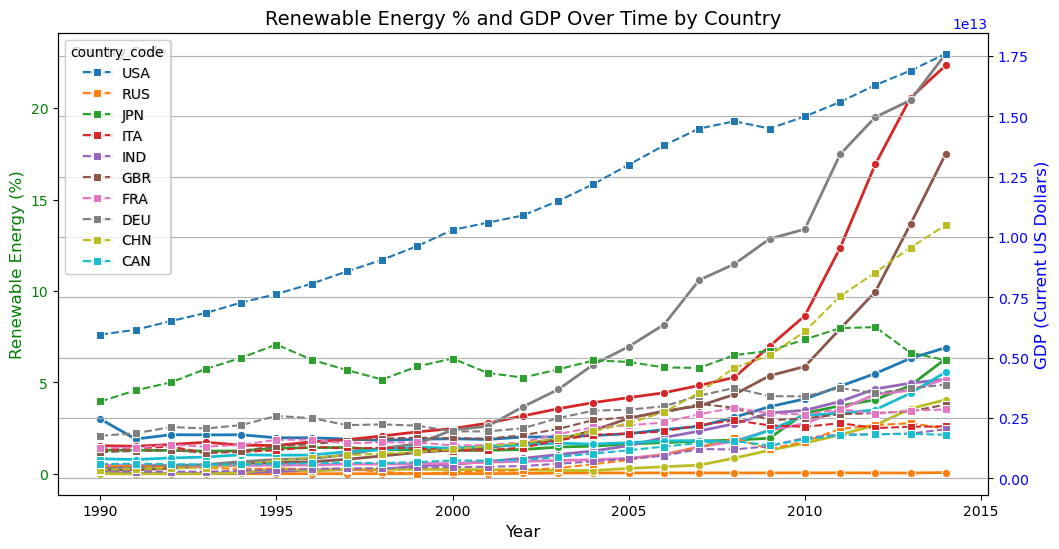

In [47]:
fig, ax1 = plt.subplots(figsize=(12,6))

# First Y-Axis (% Renewable)
sns.lineplot(data=merged_df, x='year', y='% renewable', hue='country_code', marker='o', linewidth=2, ax=ax1)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Renewable Energy (%)", fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title("Renewable Energy % and GDP Over Time by Country", fontsize=14)
ax1.legend(title="Country Code", loc="upper left")

# Second Y-Axis (Current US Dollars)
ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x='year', y='Current US Dollars', hue='country_code', marker='s', linestyle='dashed', ax=ax2)
ax2.set_ylabel("GDP (Current US Dollars)", fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Show the Plot
plt.grid(True)
plt.show()

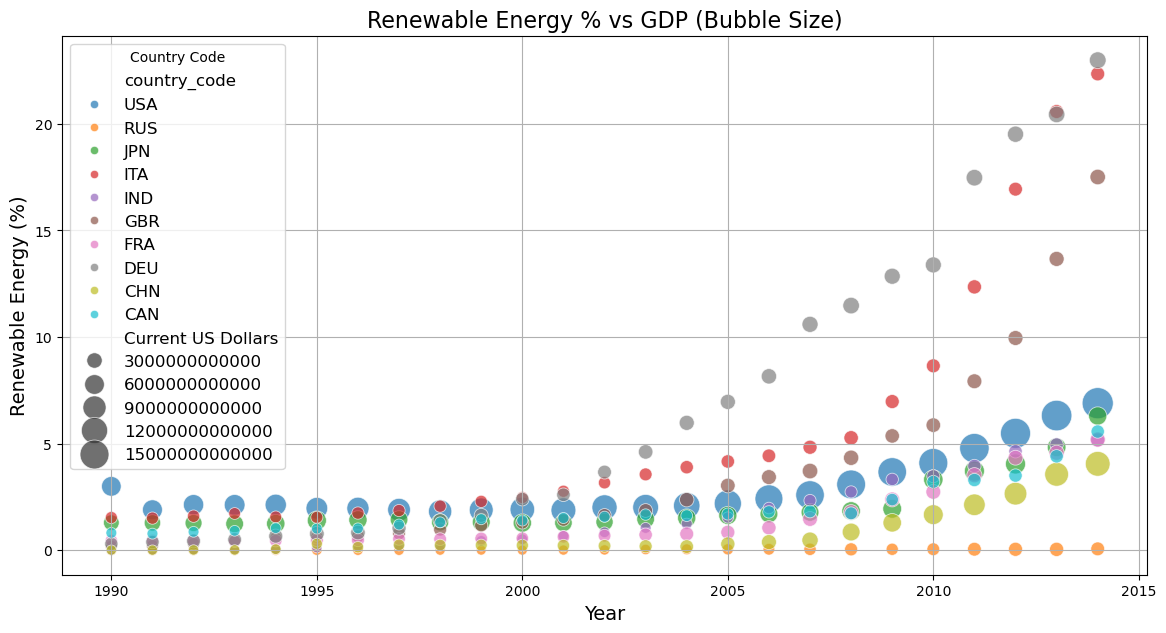

In [79]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merged_df, x='year', y='% renewable', size='Current US Dollars', hue='country_code', sizes=(50, 500), alpha=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Renewable Energy (%)", fontsize=14)
plt.title("Renewable Energy % vs GDP (Bubble Size)", fontsize=16)
plt.legend(title="Country Code", fontsize=12)
plt.grid(True)
plt.show()

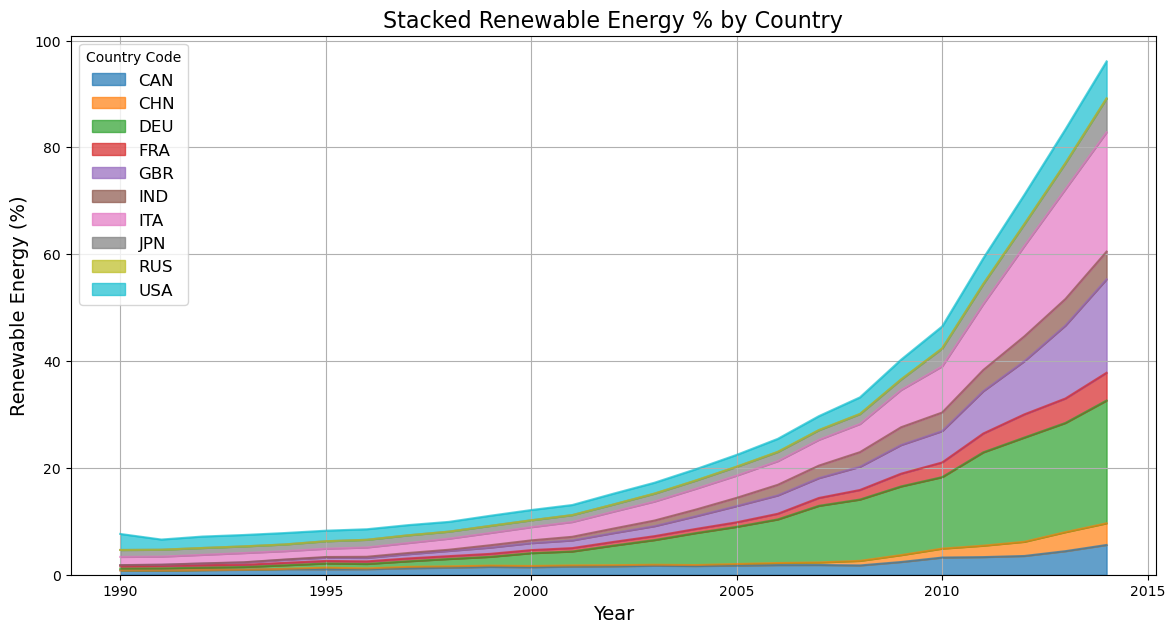

In [81]:
df_pivot = merged_df.pivot(index='year', columns='country_code', values='% renewable')

# Plot
df_pivot.plot(kind='area', stacked=True, figsize=(14, 7), alpha=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Renewable Energy (%)", fontsize=14)
plt.title("Stacked Renewable Energy % by Country", fontsize=16)
plt.legend(title="Country Code", fontsize=12)
plt.grid(True)
plt.show()

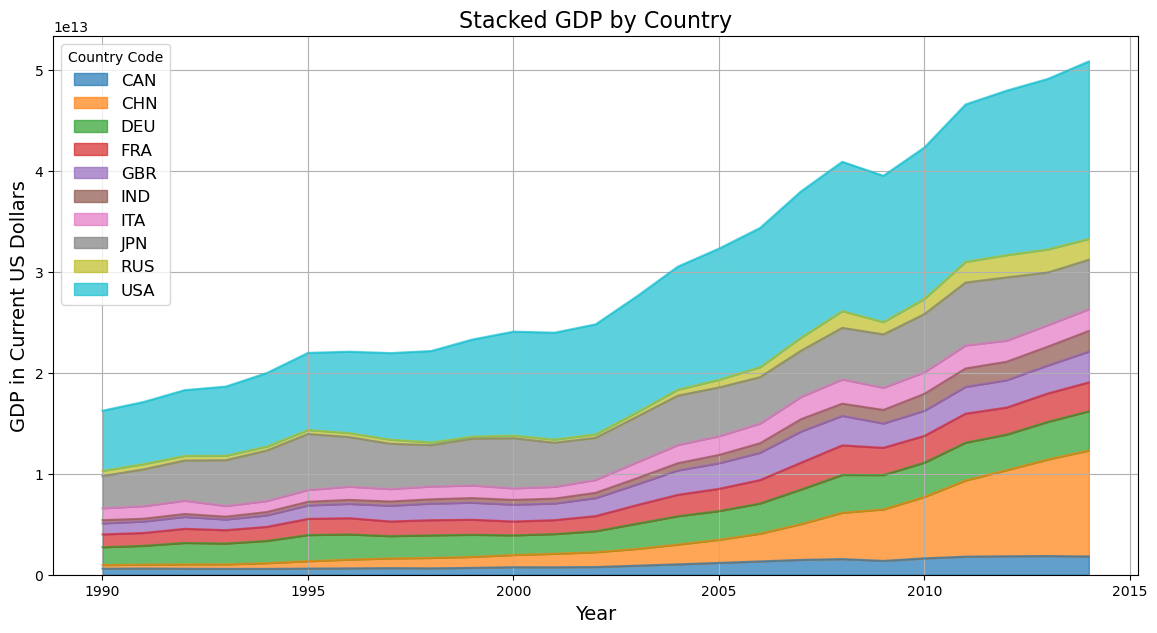

In [93]:
df_pivot = merged_df.pivot(index='year', columns='country_code', values='Current US Dollars')

# Plot
df_pivot.plot(kind='area', stacked=True, figsize=(14, 7), alpha=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP in Current US Dollars", fontsize=14)
plt.title("Stacked GDP by Country", fontsize=16)
plt.legend(title="Country Code", fontsize=12)
plt.grid(True)
plt.show()